In [1]:
import numpy as np
import pandas as pd
from astropy.stats import sigma_clipped_stats 

In [2]:
from pandas.plotting import scatter_matrix

In [3]:
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFpr

In [4]:
import rfpimp

/global/homes/b/bos0109/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [48]:
cd ..

/global/u2/b/bos0109/run2_diaproc


In [49]:
from ml_tools import custom_funs_ml as cf

/global/homes/b/bos0109/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [50]:
cd notebooks/

/global/u2/b/bos0109/run2_diaproc/notebooks


In [6]:
import seaborn as sns

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
store = pd.HDFStore('ML_dataset_store.hdf5')
store.open()

In [169]:
X_raw = store['X_cleaned']

In [170]:
X = store['X_scaled']
Y = store['Y']

In [171]:
store.close()

In [172]:
clf = cf.RandomForestClassifier(n_estimators=12)
rslts_raw = cf.experiment(clf, X_raw.values, Y.values, nfolds=6, printing=True, probs=True)

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      6350
         1.0       0.40      0.13      0.19      1432

    accuracy                           0.80      7782
   macro avg       0.62      0.54      0.54      7782
weighted avg       0.75      0.80      0.76      7782



In [173]:
np.round(X.values.mean(axis=0))

array([ 0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0.,  0., -0.,
       -0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
       -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,
        0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,
        0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0

In [174]:
np.round(X.values.std(axis=0))

array([0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1.])

In [175]:
selector = VarianceThreshold(0.1)

In [176]:
X_sel = selector.fit_transform(X)

In [177]:
print('Dropped columns:')
list(X.columns[~selector.get_support()])

Dropped columns:


['parent',
 'flags_negative',
 'base_NaiveCentroid_flag_noCounts',
 'base_NaiveCentroid_flag_edge',
 'base_PeakCentroid_flag',
 'base_SdssCentroid_flag_noSecondDerivative',
 'ip_diffim_NaiveDipoleCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 'base_GaussianFlux_flag_badCentroid',
 'base_NaiveCentroid_flag_badInitialCentroid',
 'base_PeakLikelihoodFlux_flag_badCentroid',
 'base_PsfFlux_flag_badCentroid',
 'base_SdssCentroid_flag_badInitialCentroid',
 'base_SdssShape_flag_badCentroid',
 'slot_Centroid_flag',
 'ip_diffim_NaiveDipoleCentroid_pos_flag',
 'slot_Centroid_pos_flag',
 'ip_diffim_NaiveDipoleCentroid_neg_flag',
 'slot_Centroid_neg_flag',
 'base_SdssShape_flag_psf',
 'base_GaussianFlux_flag_badShape_psf',
 'slot_Shape_flag_psf',
 'base_CircularApertureFlux_3_0_flag',
 'base_CircularApertureFlux_3_0_flag_apertureTruncated',
 'base_CircularApertureFlux_3_0_flag_sincCoeffsTruncated',
 'base_CircularApertureFlux_4_5_flag',
 'base_CircularApertureFlux_4_5_flag_aperture

In [178]:
list(X.columns[selector.get_support()])

['base_NaiveCentroid_x',
 'base_NaiveCentroid_y',
 'base_NaiveCentroid_flag',
 'base_NaiveCentroid_flag_resetToPeak',
 'base_PeakCentroid_x',
 'base_PeakCentroid_y',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xErr',
 'base_SdssCentroid_yErr',
 'base_SdssCentroid_flag',
 'base_SdssCentroid_flag_edge',
 'base_SdssCentroid_flag_almostNoSecondDerivative',
 'base_SdssCentroid_flag_notAtMaximum',
 'base_SdssCentroid_flag_resetToPeak',
 'ip_diffim_NaiveDipoleCentroid_x',
 'slot_Centroid_x',
 'ip_diffim_NaiveDipoleCentroid_y',
 'slot_Centroid_y',
 'ip_diffim_NaiveDipoleCentroid_neg_x',
 'slot_Centroid_neg_x',
 'ip_diffim_NaiveDipoleCentroid_neg_y',
 'slot_Centroid_neg_y',
 'base_SdssShape_xx',
 'slot_Shape_xx',
 'base_SdssShape_yy',
 'slot_Shape_yy',
 'base_SdssShape_xy',
 'slot_Shape_xy',
 'base_SdssShape_xxErr',
 'slot_Shape_xxErr',
 'base_SdssShape_yyErr',
 'slot_Shape_yyErr',
 'base_SdssShape_xyErr',
 'slot_Shape_xyErr',
 'base_SdssShape_x',
 'slot_Shape_x',
 'base

In [179]:
X_sel.shape

(7782, 178)

In [180]:
X_sel = pd.DataFrame(data=X_sel, columns=list(X.columns[selector.get_support()]))

In [181]:
clf = cf.RandomForestClassifier(n_estimators=12)
rslts_var = cf.experiment(clf, X_sel.values, Y.values, nfolds=6, printing=True, probs=True)

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      6350
         1.0       0.40      0.13      0.20      1432

    accuracy                           0.80      7782
   macro avg       0.62      0.54      0.54      7782
weighted avg       0.75      0.80      0.76      7782



In [182]:
d = X_sel
corr = d.corr()
# remove corr columns
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)
decorr = d.drop(correlated_features, axis=1)

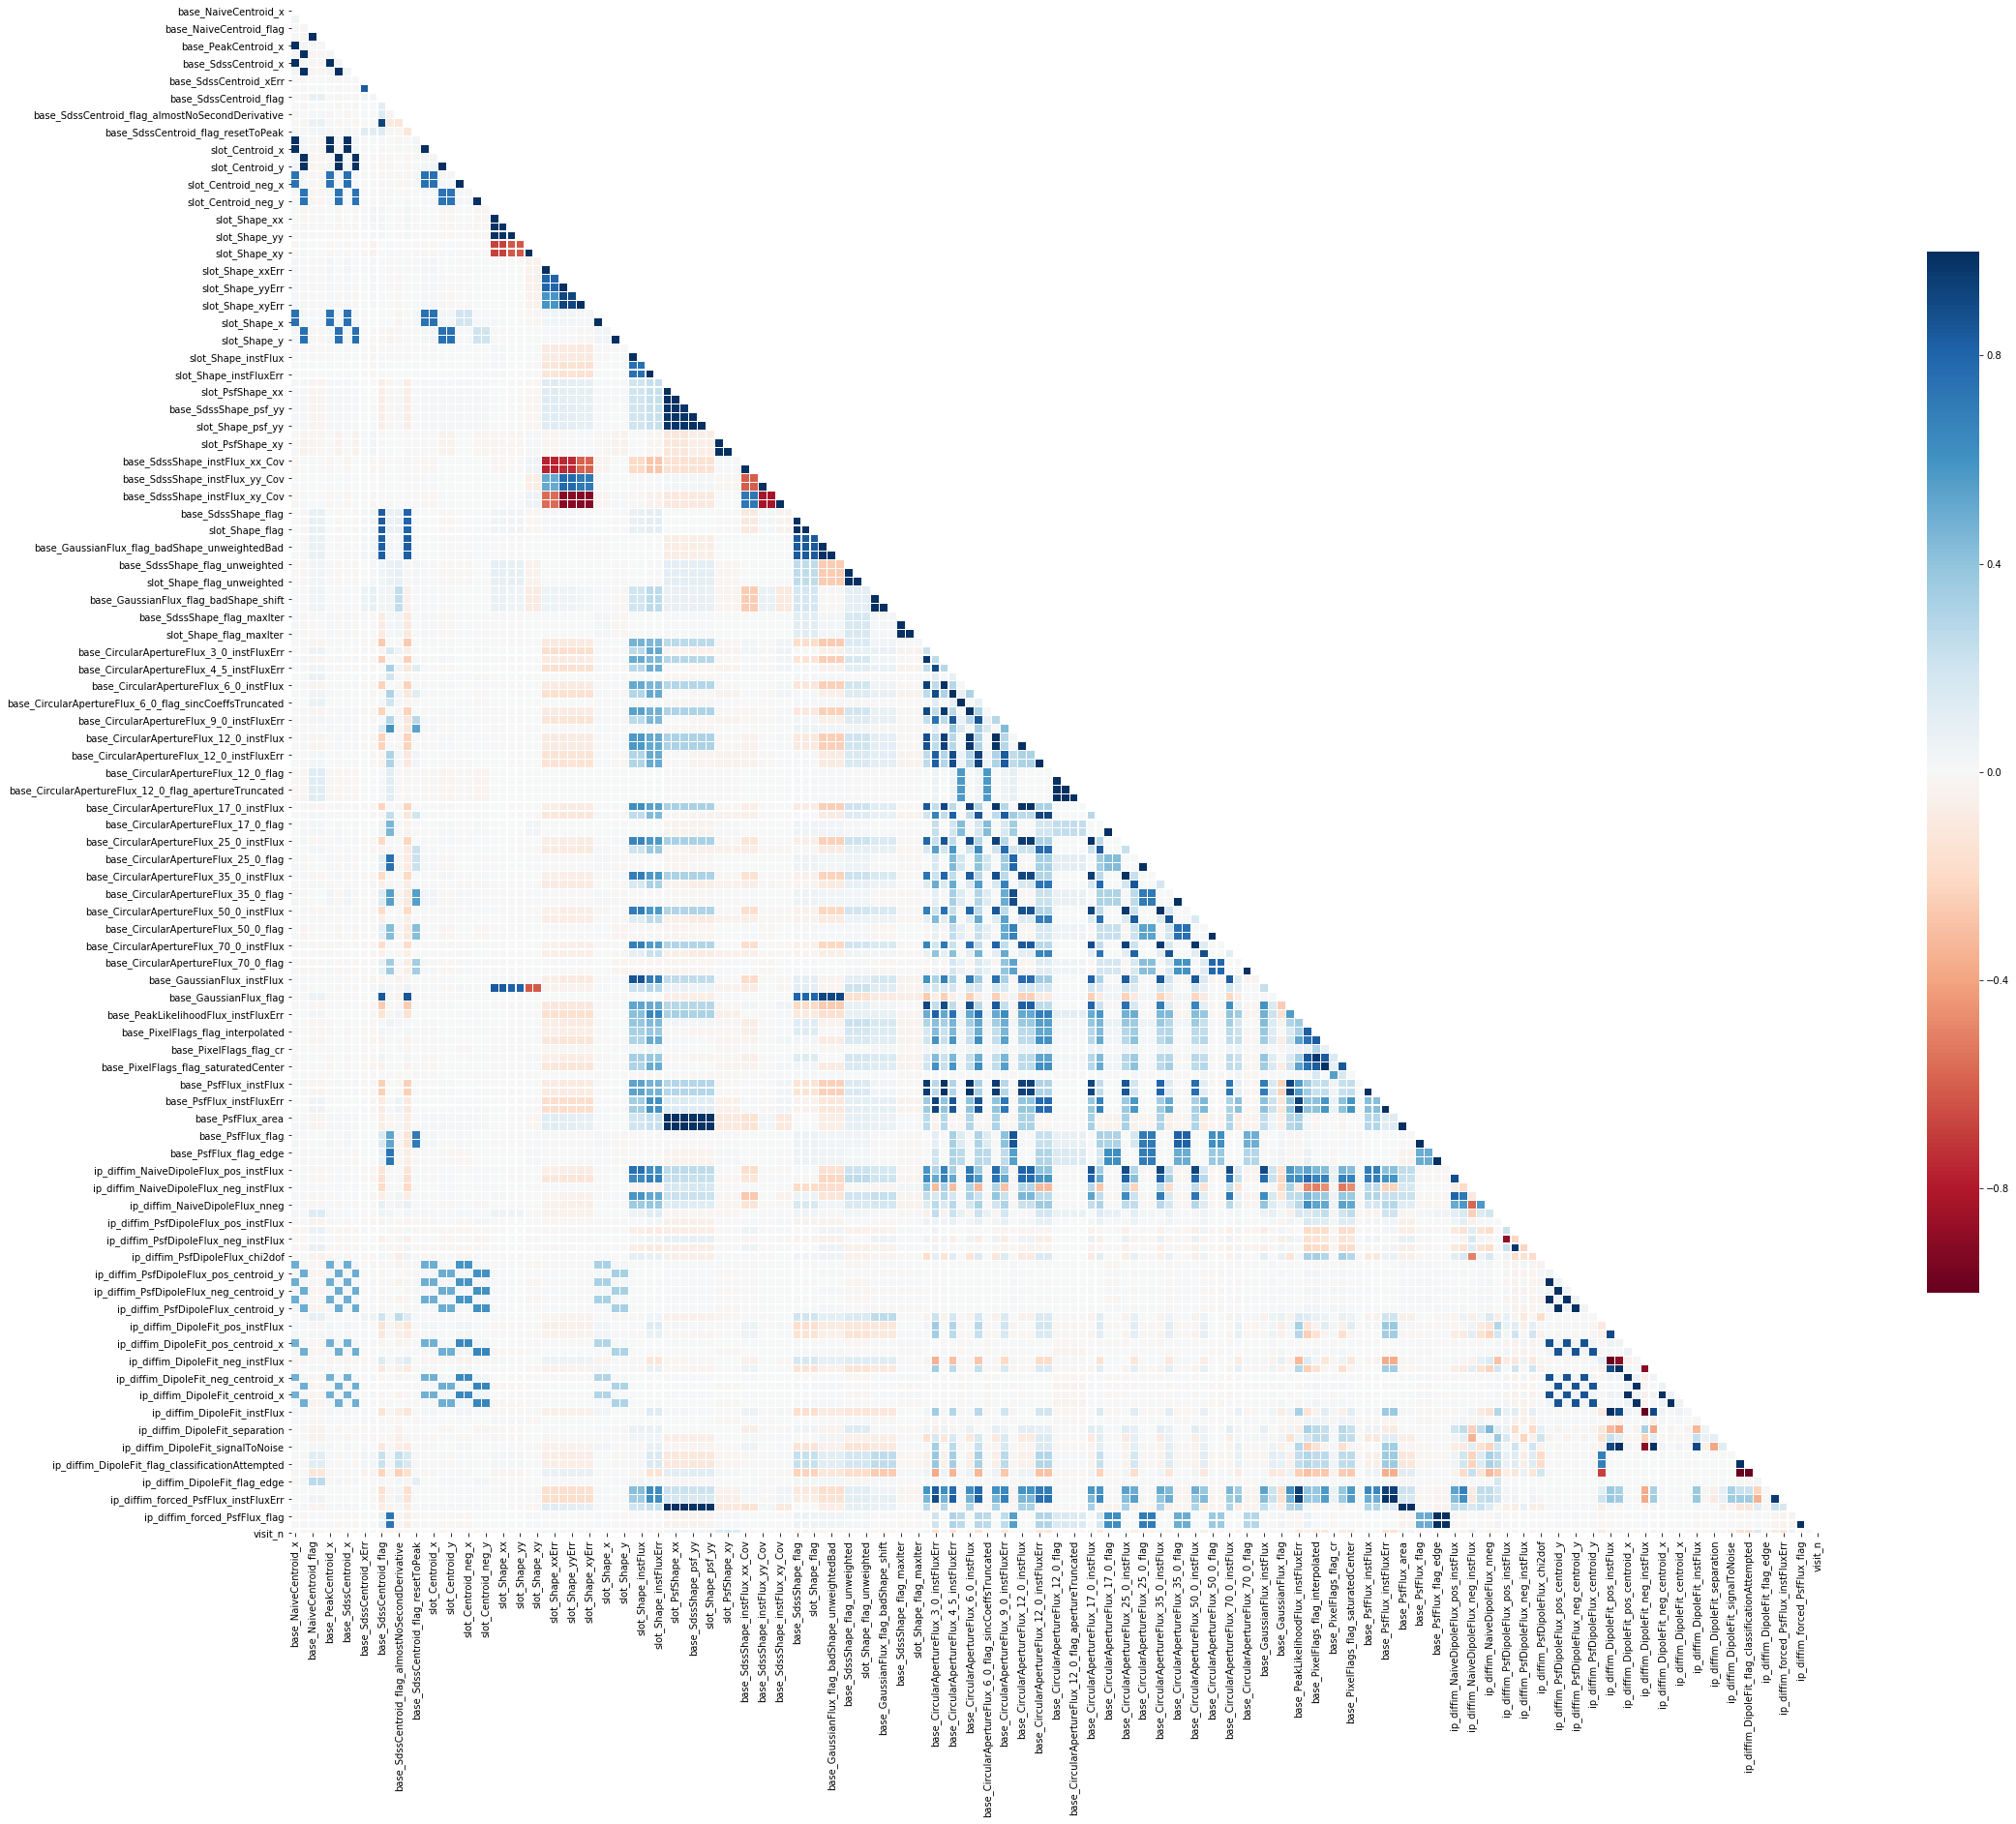

In [183]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(32, 32))

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap='RdBu', center=0,
                square=True, linewidths=.2, cbar_kws={"shrink": .5})
plt.tight_layout()

In [184]:
corr = decorr.corr()

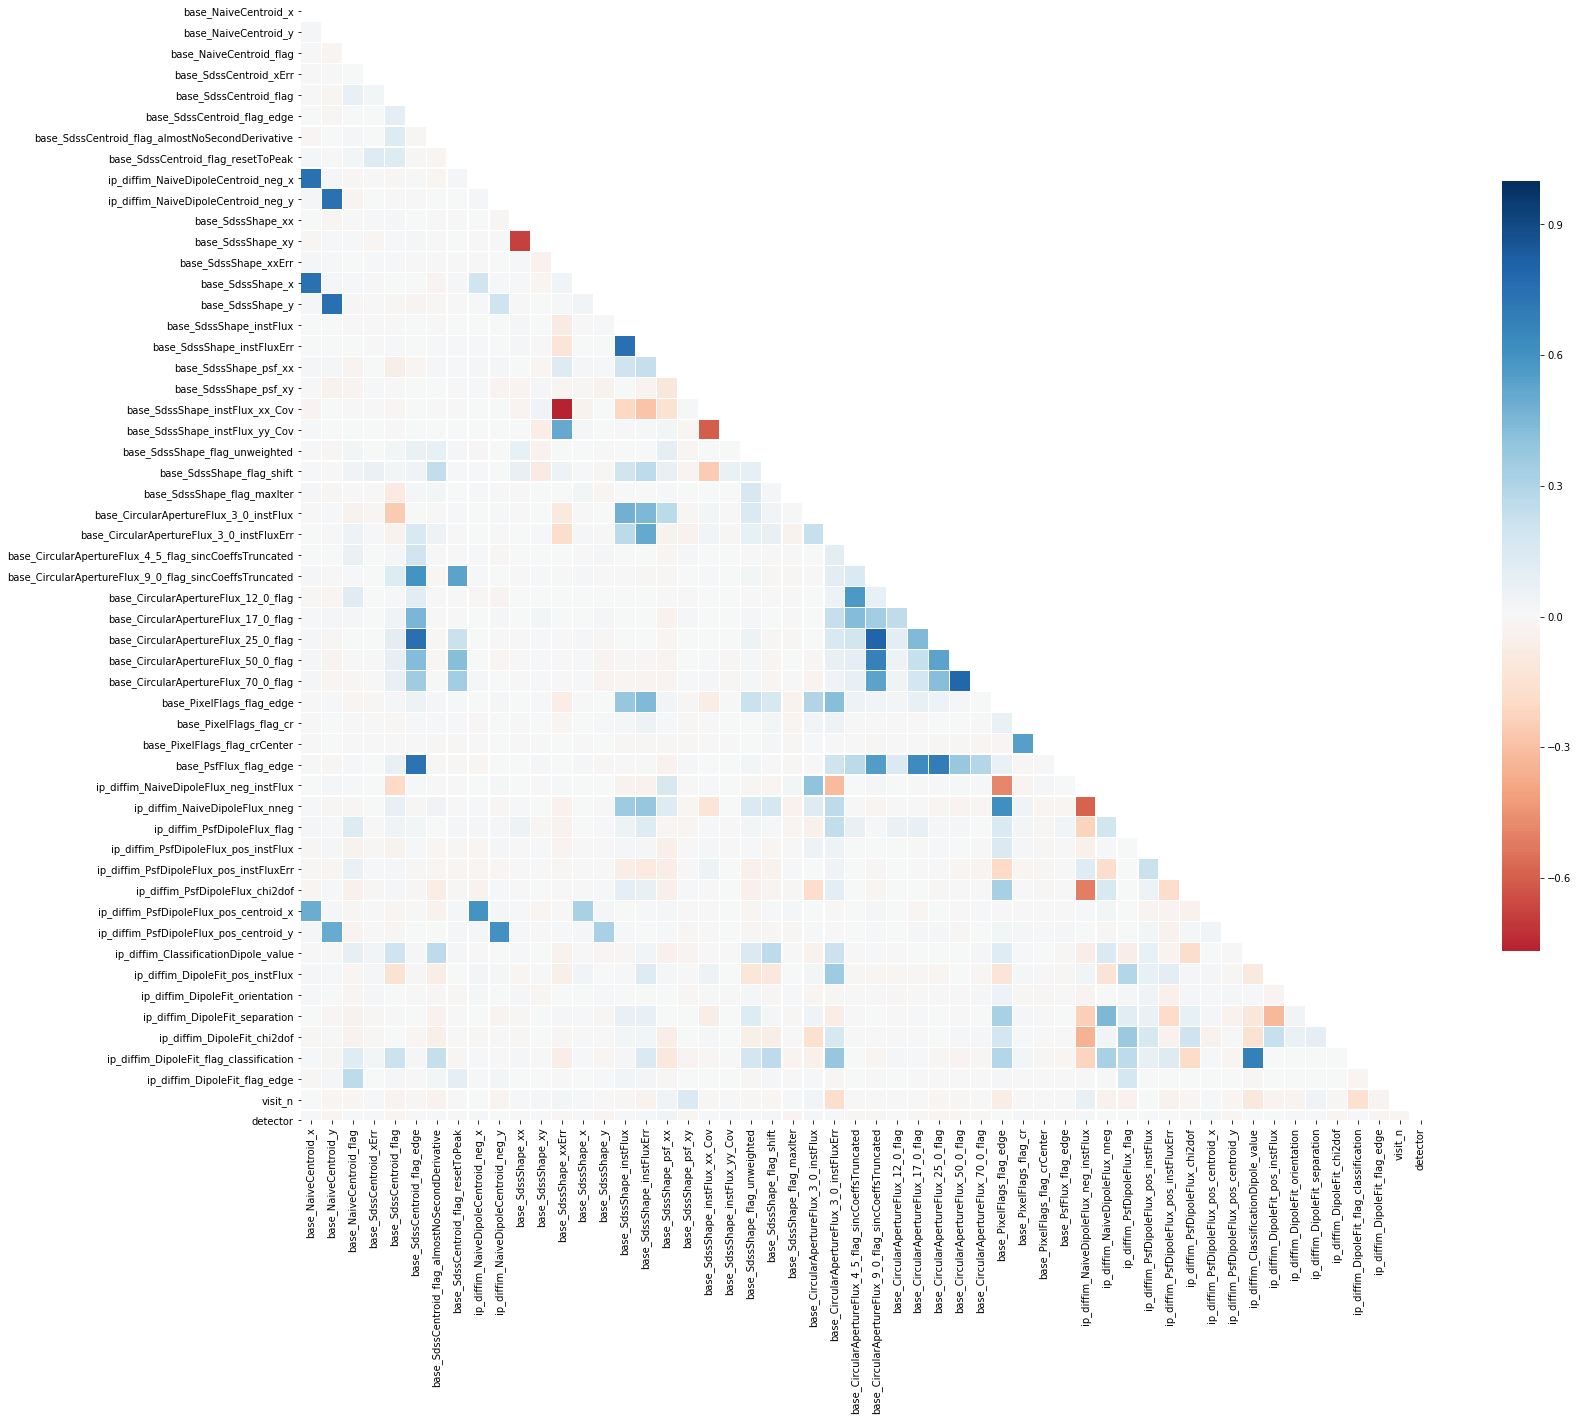

In [185]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(24, 24))

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap='RdBu', center=0,
                square=True, linewidths=.2, cbar_kws={"shrink": .5})
plt.tight_layout()

In [186]:
X_sel = decorr

In [187]:
clf = cf.RandomForestClassifier(n_estimators=12)
rslts_decorr = cf.experiment(clf, X_sel.values, Y.values, nfolds=6, printing=True, probs=True)

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      6350
         1.0       0.27      0.08      0.12      1432

    accuracy                           0.79      7782
   macro avg       0.54      0.51      0.50      7782
weighted avg       0.72      0.79      0.74      7782



In [188]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_new = selector.fit_transform(X_sel, Y)

In [189]:
X_sel = pd.DataFrame(data=X_new, columns=list(X_sel.columns[selector.get_support()]))

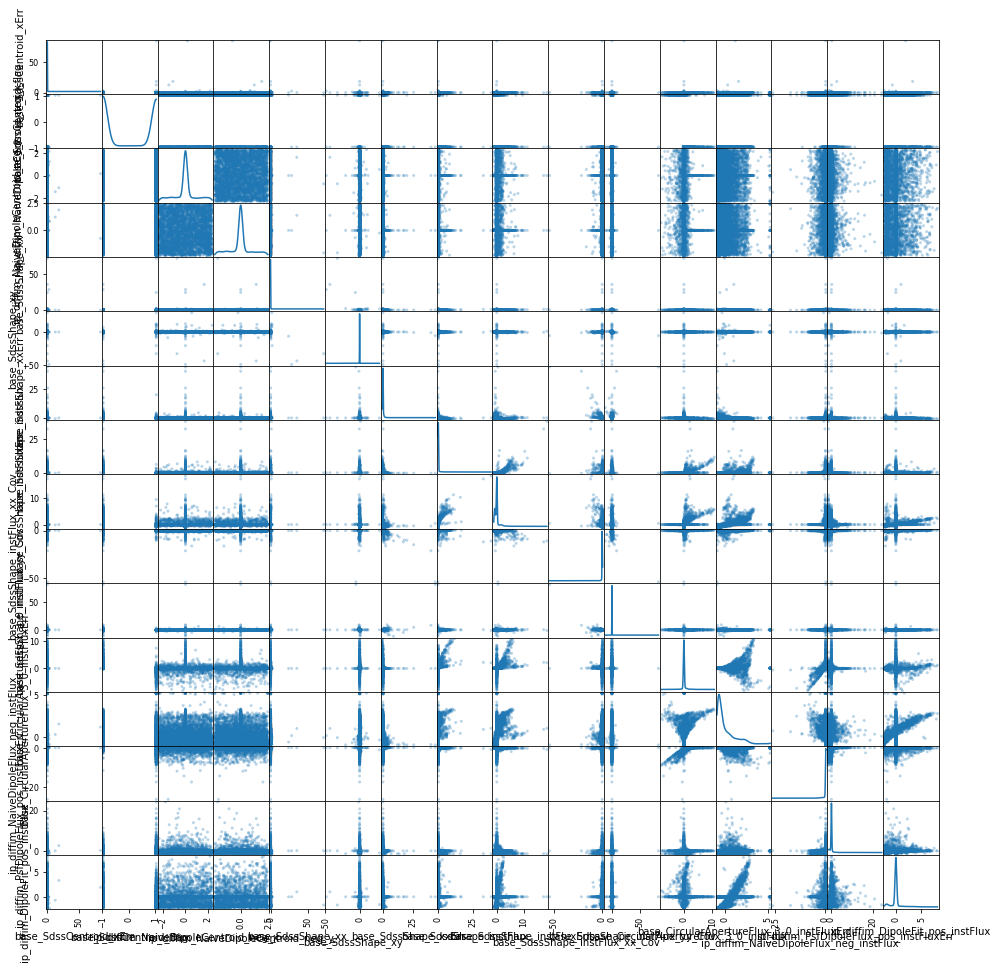

In [190]:
scatter_matrix(X_sel, diagonal='kde', alpha=0.3, figsize=(16, 16))
plt.show()

In [191]:
clf = cf.RandomForestClassifier(n_estimators=12)
rslts = cf.experiment(clf, X_sel.values, Y.values, nfolds=6, printing=True, probs=True)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90      6350
         1.0       0.53      0.28      0.36      1432

    accuracy                           0.82      7782
   macro avg       0.69      0.61      0.63      7782
weighted avg       0.79      0.82      0.80      7782



In [192]:
print(rslts['confusion_matrix'])
print(rslts['f1'])
print(rslts['bacc'])

[[5998  352]
 [1034  398]]
0.36480293308890926
0.6112499450138565


-------
### Applying PCA

In [193]:
pca = PCA(svd_solver='full', whiten=False, n_components=.9)

In [194]:
X_decomp = pca.fit_transform(X_sel)

In [195]:
np.sum(pca.explained_variance_ )

14.608573939142302

In [196]:
np.sum(pca.explained_variance_ratio_)

0.9129185445616987

In [197]:
pca.components_.shape

(11, 16)

In [198]:
X_decomp.shape

(7782, 11)

In [199]:
X_pca = pd.DataFrame(X_decomp, columns=['comp_{}'.format(i+1) for i in range(X_decomp.shape[1])])

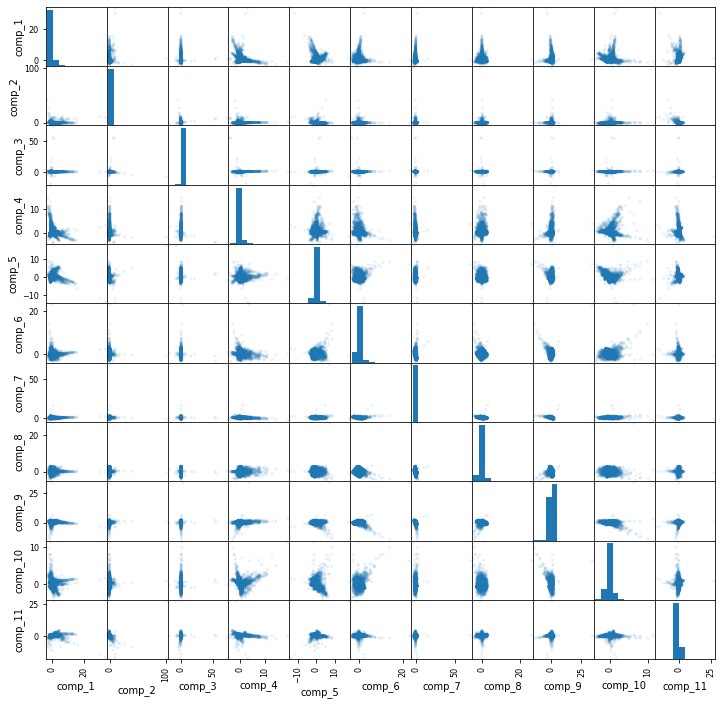

In [200]:
scatter_matrix(X_pca, diagonal='hist', alpha=0.1, figsize=(12, 12))
plt.show()

In [201]:
clf = cf.RandomForestClassifier(n_estimators=12)
rslts_pca = cf.experiment(clf, X_pca.values, Y.values, nfolds=6, printing=True, probs=True)

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      6350
         1.0       0.48      0.27      0.34      1432

    accuracy                           0.81      7782
   macro avg       0.66      0.60      0.62      7782
weighted avg       0.78      0.81      0.79      7782



## Looking at the ROC and P-R plots

Text(0.5, 0, 'False Positive Rate')

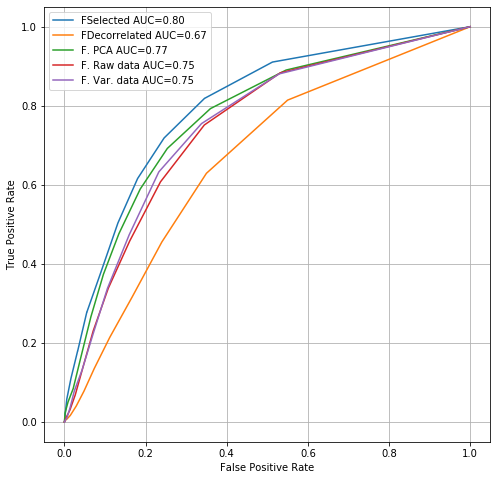

In [206]:
plt.figure(figsize=(8, 8))
plt.plot(rslts['fpr'], rslts['tpr'], label='FSelected AUC={:.2f}'.format(rslts['roc_auc']))
plt.plot(rslts_decorr['fpr'], rslts_decorr['tpr'], label='FDecorrelated AUC={:.2f}'.format(rslts_decorr['roc_auc']))
plt.plot(rslts_pca['fpr'], rslts_pca['tpr'], label='F. PCA AUC={:.2f}'.format(rslts_pca['roc_auc']))
plt.plot(rslts_raw['fpr'], rslts_raw['tpr'], label='F. Raw data AUC={:.2f}'.format(rslts_raw['roc_auc']))
plt.plot(rslts_var['fpr'], rslts_var['tpr'], label='F. Var. data AUC={:.2f}'.format(rslts_var['roc_auc']))
plt.legend(loc='best')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'Recall')

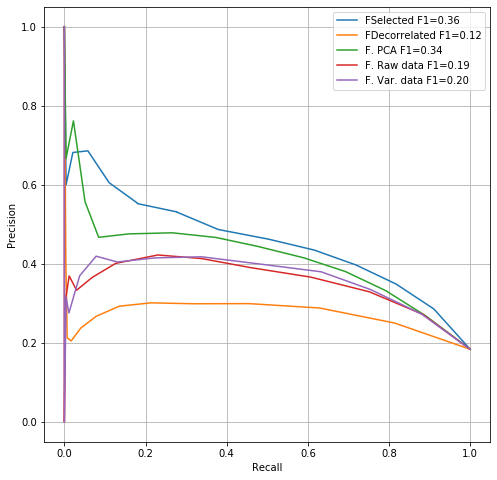

In [207]:
plt.figure(figsize=(8, 8))
plt.plot(rslts['prec_rec_curve'][1], rslts['prec_rec_curve'][0], label='FSelected F1={:.2f}'.format(rslts['f1']))
plt.plot(rslts_decorr['prec_rec_curve'][1], rslts_decorr['prec_rec_curve'][0], label='FDecorrelated F1={:.2f}'.format(rslts_decorr['f1']))
plt.plot(rslts_pca['prec_rec_curve'][1], rslts_pca['prec_rec_curve'][0], label='F. PCA F1={:.2f}'.format(rslts_pca['f1']))
plt.plot(rslts_raw['prec_rec_curve'][1], rslts_raw['prec_rec_curve'][0], label='F. Raw data F1={:.2f}'.format(rslts_raw['f1']))
plt.plot(rslts_var['prec_rec_curve'][1], rslts_var['prec_rec_curve'][0], label='F. Var. data F1={:.2f}'.format(rslts_var['f1']))
plt.legend(loc='best')
plt.grid()
plt.ylabel('Precision')
plt.xlabel('Recall')